In [1]:
#http://www.jtrive.com/the-empirical-bootstrap-for-confidence-intervals-in-python.html
import numpy as np

def bootstrap(data, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci)

In [6]:
v = [10.3, 10.6, 11.7, 14.0, 14.2, 15.0, 16.8, 18.2, 21.3, 21.0]
boot = bootstrap(v, n=5000)
print(boot(0.90))


cintervals = [boot(i) for i in (.90, .95, .99, .995)]
print(cintervals)


(13.440000000000001, 17.26)
[(13.440000000000001, 17.26), (13.060000000000002, 17.65), (12.309999999999999, 18.410000000000004), (12.069999999999999, 18.65)]


In [7]:
"""
Generate a histogram of the distribution of sample means for 
5000 bootstrap resamplings.
"""
import numpy as np
import matplotlib
import seaborn as sns
sns.set(style="darkgrid")

v = [10.3, 10.6, 11.7, 14.0, 14.2, 15.0, 16.8, 18.2, 21.3, 21.0]
xbar_init = np.round(np.mean(v), 2)

# generate 5000 resampled sample means  =>
means = [np.mean(np.random.choice(v,size=len(v),replace=True)) for i in range(5000)]

#sns.distplot(means, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675))
#plt.xlabel("Initial Sample Mean: {}".format(xbar_init))
#plt.title("Distribution of Sample Mean")
#plt.axvline(x=xbar_init) # vertical line at xbar_init
#plt.show()

Text(0.5, 1.0, 'A histogram of 5000 xbar observations')

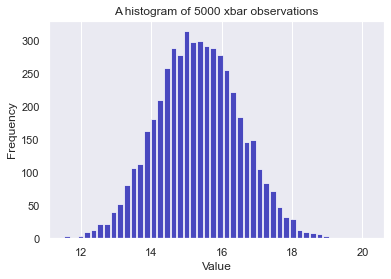

In [18]:
import matplotlib.pyplot as plt

#https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('A histogram of 5000 xbar observations')

In [33]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(loc=5000.0, scale=100.0, size=500)

print('sample average:', np.mean(vals))
print('sample standard deviation:', np.std(vals))



sample average: 5003.378946152456
sample standard deviation: 103.04994202723925


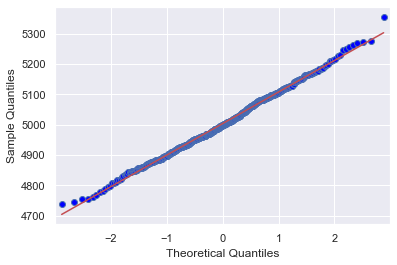

In [34]:
##qqplot
import statsmodels.api as smi
import matplotlib.pyplot as plt
import pylab
#create Q-Q plot with 45-degree line added to plot
smi.qqplot(vals, line = "r")
pylab.show()

sample average: 5009.097653974023
sample standard deviation: 100.60226023213278
2.5 quantile: 4810.660116127361
97.5 quantile: 5202.205724840149


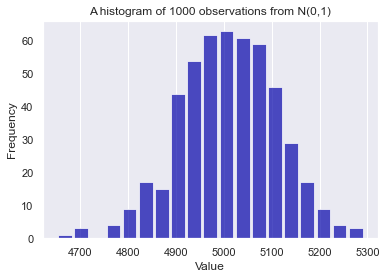

In [28]:
n, bins, patches = plt.hist(x=vals, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('A histogram of 1000 observations from N(0,1)')

print('sample average:', np.mean(vals))
print('sample standard deviation:', np.std(vals))
print('2.5 quantile:', np.quantile(vals,0.025))
print('97.5 quantile:', np.quantile(vals,0.975))


sample average: 5000.021918924719
sample standard deviation: 4.473730665351541
2.5 quantile: 4991.320505844411
97.5 quantile: 5008.610221006745


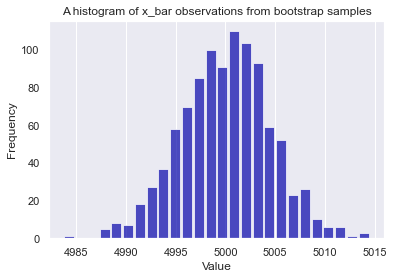

In [29]:
MAXITER = 1000
xbar_values=[]
std_values=[]
for i in range(MAXITER):
    vals = np.random.normal(loc=5000.0, scale=100.0, size=500)
    xbar_values.append(np.average (vals))
    std_values.append(np.std(vals))

n, bins, patches = plt.hist(x=xbar_values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('A histogram of x_bar observations from bootstrap samples')

print('sample average:', np.mean(xbar_values))
print('sample standard deviation:', np.std(xbar_values))
print('2.5 quantile:', np.quantile(xbar_values,0.025))
print('97.5 quantile:', np.quantile(xbar_values,0.975))

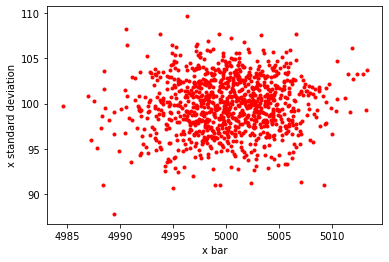

In [42]:
plt.plot(xbar_values, std_values, 'r.')
plt.xlabel('x bar')
plt.ylabel('x standard deviation')
plt.show()

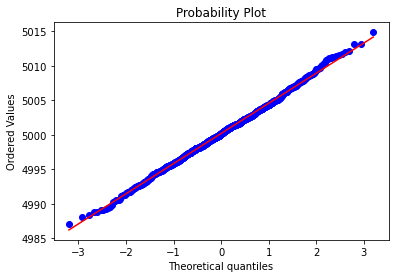

In [37]:
#print(xbar_values)
import pylab 
import scipy.stats as stats

stats.probplot(xbar_values, dist="norm", plot=pylab)
pylab.show()